# Классификация текстов

Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
import os
from google.colab import drive
 
drive.mount('/content/drive')
 
data_root = '/content/drive/MyDrive/Colab Notebooks/avito-text-classification'
os.environ['DATA_ROOT'] = data_root
 
print('Data root:', data_root)
print('Data root contains:', os.listdir(data_root))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data root: /content/drive/MyDrive/Colab Notebooks/avito-text-classification
Data root contains: ['train.csv', 'test.csv', 'sample_submission.csv']


In [3]:
train = pd.read_csv(os.path.join(data_root, 'train.csv'))

In [4]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [5]:
train.shape

(4234042, 4)

## Выведем на экран информацию о пропусках в данных.

In [6]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [5]:
train.fillna('',inplace=True)

In [8]:
train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

## Сконкатенируем заголовок и описание

In [6]:
train = train.assign(title_description = train.title + " " + train.description)

In [7]:
del train['title']
del train['description']

In [11]:
train.head()

,Category_name,Category,title_description
0,Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,"Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,"Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


## Посмотрим на данные

In [12]:
train['Category'].nunique()

50

In [13]:
import numpy as np
unique, counts = np.unique(train['Category_name'], return_counts=True)
counts = counts / counts.sum() * 100

In [14]:
df = pd.DataFrame(data=(unique,counts), index=['Класс', 'Доля в %']).T

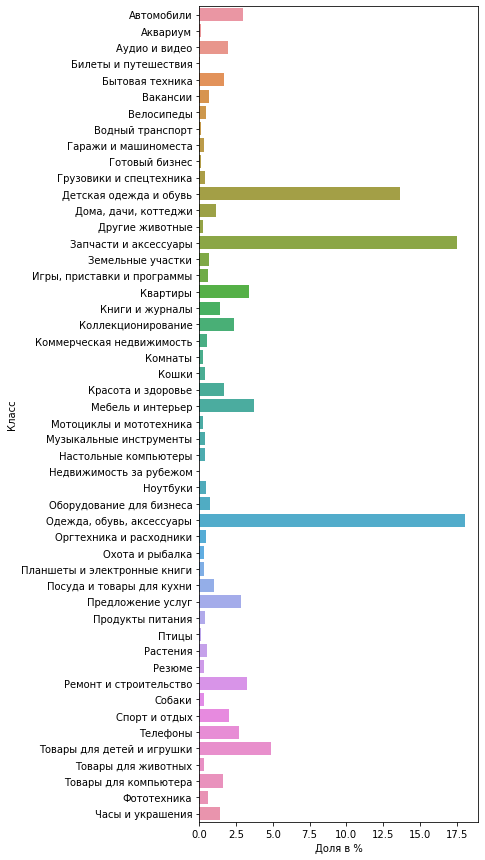

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5, 15))
sns.barplot(x ='Доля в %', y ='Класс', data= df)

In [16]:
df['Доля в %']= pd.to_numeric(df['Доля в %'])

In [17]:
df.iloc[df['Доля в %'].argmax()]

Класс       Одежда, обувь, аксессуары
Доля в %                      18.0707
Name: 31, dtype: object

In [18]:
df.iloc[df['Доля в %'].argmin()]

Класс       Недвижимость за рубежом
Доля в %                 0.00389699
Name: 28, dtype: object

### Тест CountVectorizer


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vec = CountVectorizer()

In [ ]:
bow = vec.fit_transform(train['title_description'])

In [ ]:
bow.shape

(4234042, 2125805)

## Посмотрим на словарь

In [ ]:
vec.vocabulary_

{'эбу': 2102181,
 'renault': 983123,
 'nissan': 927024,
 'dci': 737115,
 'delphi': 739000,
 '2001': 195290,
 '2008': 196213,
 'год': 1283579,
 'комплект': 1460484,
 'мозги': 1561351,
 'компьютер': 1461631,
 'мотора': 1567810,
 'двигателя': 1304989,
 'коммутатор': 1459320,
 'электронный': 2110684,
 'блок': 1184431,
 'управления': 2017492,
 'двигателем': 1304848,
 'для': 1326654,
 'рено': 1849725,
 'kangoo': 849076,
 'канго': 1426970,
 'кангу': 1426974,
 'меган': 1538330,
 'сценик': 1955314,
 'laguna': 865566,
 'лагуна': 1495469,
 'clio': 710171,
 'клио': 1448531,
 'micra': 903322,
 'ниссан': 1615698,
 'микра': 1549020,
 'другие': 1339133,
 'дизель': 1321639,
 'топливной': 1985249,
 'аппаратурой': 1146767,
 'делфи': 1312072,
 'оригинал': 1654498,
 'отличное': 1666865,
 'состояние': 1923762,
 'проверенные': 1791865,
 'гарантией': 1270215,
 'на': 1579785,
 'все': 1246492,
 'запчасти': 1375254,
 'предоставляется': 1774252,
 'гарантия': 1270367,
 'возможна': 1238061,
 'установка': 2021294,
 

In [ ]:
import re
words = list(vec.vocabulary_.keys())
words = ' '.join(words)

In [ ]:
result1 = re.findall(r'\b\d+\S+\b',words)
result1

['2001',
 '2008',
 '1000',
 '1987',
 '350',
 '405',
 '450',
 '10',
 '40',
 '20',
 '42',
 '44',
 '2000',
 '2006',
 '27808641',
 '14',
 '500',
 '00',
 '30',
 '39',
 '2012',
 '43018jn00a',
 '3744',
 '2019',
 '29',
 '2019г',
 '05',
 '59',
 '15',
 '000',
 '18',
 '4000',
 '150',
 '2010',
 '2017г',
 '60',
 '25',
 '40000',
 '46',
 '48',
 '200',
 '100',
 '3000',
 '35',
 '1866',
 '1880',
 '250',
 '2009',
 '3500',
 '1855',
 '1881',
 '1876',
 '1878',
 '1872',
 '50',
 '1918',
 '1919',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1932',
 '1934',
 '1937',
 '1938',
 '1947',
 '1957',
 '7000',
 '1769',
 '120',
 '12',
 '55',
 '2x34',
 '9x23',
 '2100',
 '65',
 '3x45',
 '3x26',
 '2700',
 '75',
 '3x53',
 '9x30',
 '3100',
 '625zz',
 '80025',
 '5x16x5мм',
 '3д',
 '70шт',
 '86',
 '92',
 '999',
 '150мм',
 '5т',
 '56k',
 '03',
 '09',
 '2003',
 '0012027',
 '21',
 '12квт',
 '14х23см',
 '171',
 '58',
 '109',
 '81',
 '34',
 '22',
 '2002',
 '074906461b',
 '4394872',
 '124',
 '7911g',
 '7912g',
 '1

In [ ]:
len(result1)

610889

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
result2 = re.findall(r'\b[!"#$%&\'()*+,-./:;<=>?@\[\\\]^_`{|}~]\S*\b',words)
result2

['____________________________________________________',
 '______________________________________________________',
 '____________________________________________________________',
 '________________________________________________________',
 '_______________________________________________________',
 '______________________',
 '__основы',
 '__изучение',
 '__импровизация',
 '__жанровые',
 '___________________________________________',
 '__________________',
 '______________________________________________',
 '_____________________________________________________',
 '________________________________',
 '__________________________________________________',
 '________________________',
 '_________________________',
 '__________________________',
 '___________________________',
 '___________________________________________________',
 '________________________________________________',
 '__________________________________',
 '_______________________________________________________________',

In [ ]:
len(result2)

2043

## Кастомный токенайзер.
0. Приводит все буквы к нижнему регистру
1. Разбивает текст на токены с помощью word_tokenizer из пакета nltk
2. Удаляет все токены содержащие числа и пунктуацию
3. Удаляет все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проводит стемминг с помощью SnowballStemmer


In [94]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
stemmer = SnowballStemmer('russian')

In [96]:
def mytokenizer(text):
  text = re.sub(r'\b\S*\d+\S*\b',' ',text)
  text = re.sub(r'\S*[!"#$%&\'()*+,-./:;<=>?@\]\[\\^_`{|}~»«—_]\S*',' ',text)
  text = re.sub(r'\s+',' ',text)
  text = word_tokenize(text.lower())
  text = np.array(text)[np.in1d(text,np.array(stopwords.words('russian')),invert=True)]
  text = [stemmer.stem(word) for word in text]
  return text

In [97]:
mytokenizer(train['title_description'][0])

['эб',
 'renault',
 'nissa',
 'dci',
 'delph',
 'год',
 'комплект',
 'эб',
 'компьютер',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'рен',
 'kango',
 'lagun',
 'cli',
 'nissa',
 'micr',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'отличн',
 'проверен',
 'запчаст',
 'предоставля',
 'возможн',
 'подробн',
 'раздел',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'запчаст',
 'автомобил',
 'пробег',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн']

### Проверим быстродействие различных функций

In [98]:
test_text = re.sub(r'\b\S*\d+\S*\b',' ',train['title_description'][0])
test_text = re.sub(r'\S*[!"#$%&\'()*+,-./:;<=>?@\]\[\\^_`{|}~»«—_]\S*',' ',test_text)
test_text = re.sub(r'\s+',' ',test_text)
test_text = word_tokenize(test_text.lower())

In [99]:
%%time
test_text1 = np.array(test_text)[np.in1d(test_text,np.array(stopwords.words('russian')),invert=True)]
test_text1 = [stemmer.stem(word) for word in test_text]

CPU times: user 4.91 ms, sys: 0 ns, total: 4.91 ms
Wall time: 5.61 ms


In [100]:
%%time
test_text2 = [stemmer.stem(word) for word in test_text if word not in stopwords.words('russian')]

CPU times: user 10.6 ms, sys: 1.07 ms, total: 11.6 ms
Wall time: 12.9 ms


In [101]:
%%time
stemmedtext=[]
for word in test_text:
  if word not in stopwords.words('russian'):
    stemmedtext.append(stemmer.stem(word))

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 13.5 ms


## Обучение с CountVectorizer
1. Возьмем случайные 100к строк из датасета. Построим по ним CountVectorizer.
2. Разбиваем полученную матрицу на train, test в отношении 4 к 1.
3. Обучим SGDClassifier на полученной выборке.
4. Считаем accuracy

In [104]:
vec = CountVectorizer(tokenizer = mytokenizer)
sam = train.sample(n=100000)
del train#чтобы в колабе ОЗУ не переполнялось

In [105]:
bow = vec.fit_transform(sam['title_description'])

In [106]:
bow.shape

(100000, 74391)

In [107]:
%%time
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, sam['Category'], random_state=13, test_size=0.8, train_size=0.2)

CPU times: user 19.1 ms, sys: 966 µs, total: 20.1 ms
Wall time: 23.2 ms


In [108]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
sgd = SGDClassifier(max_iter = 200, random_state=13)
sgd.fit(x_train,y_train)

CPU times: user 1.91 s, sys: 1.45 s, total: 3.36 s
Wall time: 1.74 s


In [109]:
pred = sgd.predict(x_test)

In [110]:
print(accuracy_score(y_test,pred))

0.761525


## Обучение с TfIdfVectorizer



In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer = mytokenizer,max_df=0.9)

In [112]:
%%time
bow = tfidf_vec.fit_transform(sam['title_description'])

CPU times: user 2min 50s, sys: 2.31 s, total: 2min 53s
Wall time: 2min 52s


In [113]:
%%time
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, sam['Category'], random_state=13, test_size=0.8, train_size=0.2)

CPU times: user 22.4 ms, sys: 1.03 ms, total: 23.4 ms
Wall time: 24.7 ms


In [114]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
sgd = SGDClassifier(max_iter = 200, random_state=13)
sgd.fit(x_train,y_train)

CPU times: user 1.4 s, sys: 1.03 s, total: 2.44 s
Wall time: 1.26 s


In [115]:
pred = sgd.predict(x_test)

In [116]:
print(accuracy_score(y_test,pred))

0.7985375


## Hashing trick


In [118]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(tokenizer = mytokenizer, n_features=30000)

In [119]:
bow = hash_vec.fit_transform(sam['title_description'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [120]:
bow.shape

(100000, 30000)

In [121]:
%%time
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, sam['Category'], random_state=13, test_size=0.8, train_size=0.2)

CPU times: user 21.3 ms, sys: 939 µs, total: 22.3 ms
Wall time: 26.8 ms


In [122]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
sgd = SGDClassifier(max_iter = 200, random_state=13)
sgd.fit(x_train,y_train)

CPU times: user 1.16 s, sys: 841 ms, total: 2 s
Wall time: 1.04 s


In [123]:
pred = sgd.predict(x_test)
print(accuracy_score(y_test,pred))

0.7813125
